1. Summary Statistics
<br/>(a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use
volatility to refer to standard deviation.)
<br/>(b) Which assets have the best and worst Sharpe ratios4?

In [1]:
# Import pandas, numpy
import pandas as pd
import numpy as np
# Read excel file, sheet excess returns
excessReturnData = pd.read_excel('../data/multi_asset_etf_data.xlsx', 'excess returns')
# Set the index to Data (rather than default 0 indexing)
excessReturnData = excessReturnData.set_index('Date')
# Display top rows for validation
excessReturnData.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155028,0.114636,0.137906,-0.028006,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163134,0.159872,0.132390,0.029027,-0.020301,0.023199,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014649,0.032917,-0.006171,-0.025462,0.044850,-0.004035,-0.001254,0.001383
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069218,0.008344,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131503,0.032977,-0.004586,0.036504,0.007977


In [2]:
# Summary Statistics- 1(a)
# Calculate the mean of the data * 12 for annualization (don't want monthly data)
# Defaults to Axis=0 (columns)
summaryStatistics = (excessReturnData.mean() * 12).to_frame('Mean')

# Add in column for volatility
# Volatility is standard deviation, annualized with sqrt(12)
summaryStatistics['Volatility'] = excessReturnData.std() * np.sqrt(12)

# Calculate Sharpe Ratios (Sharpe = mean/volatility). Higher = Better
summaryStatistics['Sharpe'] = summaryStatistics['Mean']/summaryStatistics['Volatility']

# Display result
summaryStatistics

,Mean,Volatility,Sharpe
BWX,0.000003,0.078307,0.000034
DBC,0.034196,0.180663,0.189279
EEM,0.067971,0.192071,0.353884
EFA,0.076474,0.162298,0.471197
HYG,0.066938,0.089701,0.746233
IEF,0.021182,0.059387,0.356685
IYR,0.145477,0.184744,0.787452
PSP,0.128622,0.221773,0.579971
QAI,0.018212,0.049174,0.370346
SPY,0.145643,0.145260,1.002640


In [3]:
# Best Sharpe Ratio
summaryStatistics.nlargest(1, 'Sharpe')


,Mean,Volatility,Sharpe
SPY,0.145643,0.14526,1.00264


In [4]:
# Worst Sharpe Ratio
summaryStatistics.nsmallest(1, 'Sharpe')

,Mean,Volatility,Sharpe
BWX,0.000003,0.078307,0.000034


Based on the calculations above, we can see that the asset class with the worst Sharpe ratio is BWX (SPDR Bloomberg International Tr), with a ratio of 0.000034. The asset class with the best Sharpe ratio is SPY (SPDR S&P 500), with a ratio of 1.00264.

2. Descriptive Analysis
<br/>(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation?
And the lowest?
<br/>(b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign
bonds?
<br/>(c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that
Harvard should consider them as a separate asset?

In [5]:
# Calculate the correlation matrix rounded to the 4th decimal place
correlationMatrix = round(excessReturnData.corr(), 4)
correlationMatrix

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.0000,0.3325,0.6065,0.5798,0.5385,0.3439,0.4151,0.5141,0.6384,0.4313,0.5737
DBC,0.3325,1.0000,0.5663,0.5796,0.4550,-0.4049,0.2874,0.4862,0.5373,0.4939,0.0824
EEM,0.6065,0.5663,1.0000,0.8470,0.7259,-0.2388,0.6001,0.7874,0.7938,0.7356,0.2353
EFA,0.5798,0.5796,0.8470,1.0000,0.7647,-0.2646,0.6822,0.9093,0.8401,0.8747,0.2079
HYG,0.5385,0.4550,0.7259,0.7647,1.0000,-0.0923,0.7485,0.8261,0.7630,0.7598,0.3131
IEF,0.3439,-0.4049,-0.2388,-0.2646,-0.0923,1.0000,-0.0168,-0.2434,-0.0493,-0.2687,0.6733
IYR,0.4151,0.2874,0.6001,0.6822,0.7485,-0.0168,1.0000,0.7469,0.6269,0.7415,0.3351
PSP,0.5141,0.4862,0.7874,0.9093,0.8261,-0.2434,0.7469,1.0000,0.8289,0.9040,0.2382
QAI,0.6384,0.5373,0.7938,0.8401,0.7630,-0.0493,0.6269,0.8289,1.0000,0.8358,0.4047
SPY,0.4313,0.4939,0.7356,0.8747,0.7598,-0.2687,0.7415,0.9040,0.8358,1.0000,0.2117


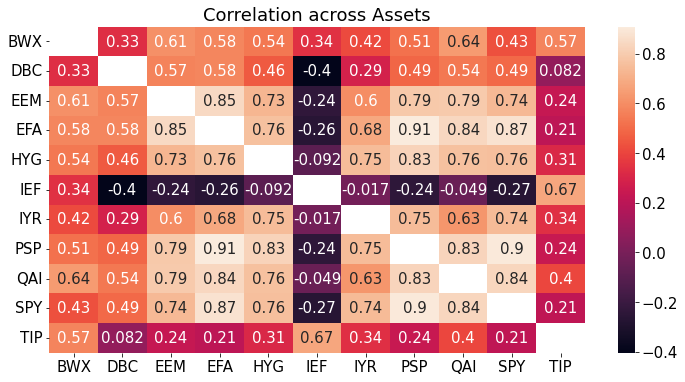

In [13]:
# Improvement 1
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
sns.heatmap(correlationMatrix,annot=True);
plt.title('Correlation across Assets');

In [6]:
# Make the diagonals NaN so we can find the highest and lowest pairwise correlations
correlationMatrix[correlationMatrix == 1] = None

corr_rank = correlationMatrix.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')


MIN Correlation pair is ('IEF', 'DBC')
MAX Correlation pair is ('EFA', 'PSP')


In [10]:
# Difference 1
abs_corr_rank = abs(corr_rank).sort_values()
abs_pair_max = abs_corr_rank.index[-1]
abs_pair_min = abs_corr_rank.index[0]

print(f'MIN Correlation pair is {abs_pair_min}:{abs_corr_rank[0]}')
print(f'MAX Correlation pair is {abs_pair_max}:{abs_corr_rank[-1]}')

MIN Correlation pair is ('IYR', 'IEF'):0.0168
MAX Correlation pair is ('EFA', 'PSP'):0.9093


2(a) The pair of asset classes with the lowest correlation is IEF (iShares 7-10 Year Treasury Bond) and DBC (Invesco DB Commodity Index Trac). The pair of asset classes with the highest correlation is EFA (iShares MSCI EAFE ETF) and PSP (Invesco Global Listed Private E).

In [14]:
# Compare TIPS to domestic bonds (IEF) and foreign bonds (BWX)
summaryStatistics.loc[['TIP', 'IEF', 'BWX']]

,Mean,Volatility,Sharpe
TIP,0.030317,0.047681,0.635828
IEF,0.021182,0.059387,0.356685
BWX,0.000003,0.078307,0.000034


2(b) Remembering that Mean = Returns, TIPS outperformed both the domestic and foreign bonds in returns. Additionally, TIPS had a lower Volatility than either of the other asset classes, so its overall Sharpe Ratio was better.

2(c) TIP is not very highly correlated to any other asset classes. Only IEF and BWX have a cross-correlation with TIP > 0.5. Given that TIP outperformed both of the asset classes it is most closely correlated with, TIP is worth adding to the portfolio.

3. The MV frontier.
<br/> (a) Compute and display the weights of the tangency portfolios: wt.
<br/> (b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
wt.

In [15]:
# Remember tangency portfolio = ( 1 / 1' * (Sigma^-1) * mu) * (Sigma^-1) * mu
# Where Sigma^-1 is the inverse of the covariance matrix
# mu is the vector of mean excess returns
# Write method compute_tangency to return weights of the tangency portfolio, given matrix of excess returns


def compute_tangency(excessReturnMatrix):
    # Get the covariance matrix based on excess returns
    sigma = excessReturnMatrix.cov()
    
    # Get the number of asset classes (in this example should be 11)
    n = sigma.shape[0]
    
    # Get the vector of mean excess returns
    mu = excessReturnMatrix.mean()
    
    # Get sigma inverse
    sigma_inv = np.linalg.inv(sigma)
    
    # Now we have all the pieces, do the calculation
    weights = (sigma_inv @ mu) / (np.ones(n) @ sigma_inv @ mu)
    
    # Convert back to a Series for convenience
    return pd.Series(weights, index=mu.index)

tangency_weights = compute_tangency(excessReturnData)
tangency_weights.to_frame('Tangency Weights')

,Tangency Weights
BWX,-2.521104
DBC,0.468378
EEM,0.744506
EFA,-0.267319
HYG,2.007920
IEF,4.799263
IYR,-0.600881
PSP,-0.912219
QAI,-8.823273
SPY,4.894721


(b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to the tangency portfolio.

In [16]:
def portfolio_stats(excessReturnData, portfolio_weights):
    # Calculate the mean by multiplying the mean excess returns by the tangency weights and annualizing
    # TODO: double check where these formulas came from (class notes?)
    mean = excessReturnData.mean() @ portfolio_weights * 12

    # Volatility = sqrt(variance), and by class notes: variance = allocation_matrix * covariance_matrix * allocation_matrix
    # Annualize the result with sqrt(12)
    vol = np.sqrt(portfolio_weights @ excessReturnData.cov() @ portfolio_weights) * np.sqrt(12)

    # Sharpe Ratio is mean / vol
    sharpe_ratio = mean / vol

    # Format for easy reading
    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
        index = ['Mean', 'Volatility', 'Sharpe'], 
        columns = ['Portfolio Stats']), 4)
    
portfolio_stats(excessReturnData, tangency_weights)

,Portfolio Stats
Mean,0.6664
Volatility,0.3454
Sharpe,1.9291


In [50]:
# Difference 2 / But same results
def portfolio_stats(excessReturnData, portfolio_weights):
    # Calculate the mean by multiplying the mean excess returns by the tangency weights and annualizing
    # TODO: double check where these formulas came from (class notes?)
    mean = excessReturnData.mean() @ portfolio_weights * 12

    # Volatility = sqrt(variance), and by class notes: variance = allocation_matrix * covariance_matrix * allocation_matrix
    # Annualize the result with sqrt(12)
    vol = (excessReturnData @ portfolio_weights).std()*np.sqrt(12)

    # Sharpe Ratio is mean / vol
    sharpe_ratio = mean / vol

    # Format for easy reading
    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
        index = ['Mean', 'Volatility', 'Sharpe'], 
        columns = ['Portfolio Stats']), 4)
    
portfolio_stats(excessReturnData, tangency_weights)

,Portfolio Stats
Mean,0.6664
Volatility,0.3454
Sharpe,1.9291


4. The allocation.
    <br/>(a) Compute and display the weights of MV portfolios with target returns of μp = .015.
    <br/>(b) What is the mean, volatility, and Sharpe ratio for wp?
    <br/>(c) Discuss the allocation. In which assets is the portfolio most long? And short?
    <br/>(d) Does this line up with which assets have the strongest Sharpe ratios?

In [51]:
# Compute weights for return of 0.015
def compute_weights(excessReturnData, tangency_weights, target_return):
    mu = excessReturnData.mean()
    sigma = excessReturnData.cov()
    n = sigma.shape[0]
    scalar = ((np.ones(n) @ np.linalg.inv(sigma) @ mu) / (mu @ np.linalg.inv(sigma) @ mu)) * target_return
    return scalar * tangency_weights

optimized_portfolio = compute_weights(excessReturnData, tangency_weights, 0.015)
optimized_portfolio

BWX   -0.680999
DBC    0.126518
EEM    0.201106
EFA   -0.072208
HYG    0.542378
IEF    1.296374
IYR   -0.162310
PSP   -0.246408
QAI   -2.383338
SPY    1.322159
TIP    0.326847
dtype: float64

In [52]:
portfolio_stats(excessReturnData, optimized_portfolio)

,Portfolio Stats
Mean,0.1800
Volatility,0.0933
Sharpe,1.9291


In [53]:
# (c) Discuss the allocation. In which assets is the portfolio most long? And short?

optimized_portfolio.sort_values() 

QAI   -2.383338
BWX   -0.680999
PSP   -0.246408
IYR   -0.162310
EFA   -0.072208
DBC    0.126518
EEM    0.201106
TIP    0.326847
HYG    0.542378
IEF    1.296374
SPY    1.322159
dtype: float64

Based on the sorting above, we can see the the portfolio is most long on SPY. It is also almost identically long on IEF. It is most short on QAI. It is also short a few other assets, but not nearly to the extent of QAI.

In [54]:
# Does this line up with which assets have the strongest Sharpe ratios?
summaryStatistics.sort_values('Sharpe')

,Mean,Volatility,Sharpe
BWX,0.000003,0.078307,0.000034
DBC,0.034196,0.180663,0.189279
EEM,0.067971,0.192071,0.353884
IEF,0.021182,0.059387,0.356685
QAI,0.018212,0.049174,0.370346
EFA,0.076474,0.162298,0.471197
PSP,0.128622,0.221773,0.579971
TIP,0.030317,0.047681,0.635828
HYG,0.066938,0.089701,0.746233
IYR,0.145477,0.184744,0.787452


In [55]:
# Difference 3
# Does this line up with which assets have the strongest Sharpe ratios?
rank_df = pd.DataFrame(columns=['Sharpe_Rank','Weight_Rank'])
rank_df['Sharpe_Rank']=summaryStatistics['Sharpe'].rank(ascending=False)
rank_df['Weight_Rank']=optimized_portfolio.rank(ascending=False)
print(rank_df.corr())
rank_df.sort_values('Sharpe_Rank')

             Sharpe_Rank  Weight_Rank
Sharpe_Rank     1.000000     0.372727
Weight_Rank     0.372727     1.000000


,Sharpe_Rank,Weight_Rank
SPY,1.0,1.0
IYR,2.0,8.0
HYG,3.0,3.0
TIP,4.0,4.0
PSP,5.0,9.0
EFA,6.0,7.0
QAI,7.0,11.0
IEF,8.0,2.0
EEM,9.0,5.0
DBC,10.0,6.0


No, it does not. While SPY does have the highest Sharpe ratio, IEF's Sharpe ratio is actually smaller than QAI's.

5. Simple Portfolios
<br/>(a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the
entire weighting vector to have target mean μp = .015. Report its mean, volatility, and
Sharpe ratio.
<br/>(b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a
term used in a variety of ways, but here we have in mind setting the weight of the portfolio
to be proportional to the inverse of its full-sample volatility estimate.
wi = 1/σi
This will give the weight vector, w, but you will need to rescale it to have a target mean
of μp = .015.
<br/>(c) How does these compare to the MV portfolio from problem 2.4?

In [56]:
# First get the equally weighted portfolio
# Create a vector of the same length as the tangency_weights (11 in this example)
# Then, anywhere the weight is 1, set it equal to 1/n (1/11 in this example)
equal_weights = np.ones(len(tangency_weights))
equal_weights[equal_weights==1] = 1/len(tangency_weights)

target_mean = 0.015

# Scale for target return
equal_weights = equal_weights * target_mean / (excessReturnData.mean().sum()/11)
portfolio_stats(excessReturnData, equal_weights)

,Portfolio Stats
Mean,0.1800
Volatility,0.2702
Sharpe,0.6662


In [57]:
# First get weights, 1/vol (Remember volatility = standard deviation)
weights = 1/excessReturnData.std()

target_return = 0.015
weights = weights * target_return / (weights @ excessReturnData.mean())
weights.to_frame('Weights')

,Weights
BWX,0.418426
DBC,0.181364
EEM,0.170592
EFA,0.201887
HYG,0.365278
IEF,0.551732
IYR,0.177357
PSP,0.147745
QAI,0.666317
SPY,0.225567


In [58]:
portfolio_stats(excessReturnData, weights)

,Portfolio Stats
Mean,0.1800
Volatility,0.2594
Sharpe,0.6938


How does these compare to the MV portfolio from problem 2.4?
<br/> In this Risk Parity example, the Volatility is significantly higher, and Sharpe is much lower. However, the Risk Parity portfolio doesn't have any short positions and is not nearly as extreme in its holdings as the MV Portfolio.

In [59]:
# 6. Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and
# just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And
# how much worse is the performance in 3.3?

# Drop TIPS
excessReturnDataWithoutTips = excessReturnData.drop(columns=['TIP'])
tangency_weights_without_tips = compute_tangency(excessReturnDataWithoutTips)
optimized_portfolio_without_tips = compute_weights(excessReturnDataWithoutTips, tangency_weights_without_tips, 0.015)
portfolio_stats(excessReturnDataWithoutTips, optimized_portfolio_without_tips)

,Portfolio Stats
Mean,0.1800
Volatility,0.0937
Sharpe,1.9209


We see a very slight increase in Volatility (0.0004) and a minimal decrease in the Sharpe Ratio (.0082). There is almost no difference in the performance statistics when TIPS is excluded.

7. Out-of-Sample Performance
<br/>Let’s divide the sample to both compute a portfolio and then check its performance out of
sample.
<br/>(a) Using only data through the end of 2021, compute wp for μp = .015, allocating to all 11
assets.
<br/>(b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the
end of 2021.
<br/>(c) Again using those weights, (derived using data through 2021,) calculate the portfolio’s
Sharpe ratio based on performance in 2022.

In [64]:
# First just get data through 2021
excessReturnData2021 = excessReturnData.loc[:'2021']

# Compute tangency weights
tangency_weights_2021 = compute_tangency(excessReturnData2021)

# Get optimized portfolio
optimized_portfolio_2021 = compute_weights(excessReturnData2021, tangency_weights_2021, 0.015)
optimized_portfolio_2021

BWX   -0.250124
DBC   -0.009556
EEM    0.033781
EFA   -0.070966
HYG    0.651083
IEF    1.240106
IYR   -0.261666
PSP   -0.068852
QAI   -1.930070
SPY    1.176838
TIP    0.246294
dtype: float64

In [61]:
# Calculate sharpe ratio for 2021 portfolio
portfolio_stats(excessReturnData2021, optimized_portfolio_2021)

,Portfolio Stats
Mean,0.1800
Volatility,0.0799
Sharpe,2.2529


In [62]:
# Calculate Sharpe ratio for 2022 data using 2021 weights
excessReturnData2022 = excessReturnData.loc['2022':]

portfolio_stats(excessReturnData2022, optimized_portfolio_2021)

,Portfolio Stats
Mean,-0.1584
Volatility,0.2268
Sharpe,-0.6983
